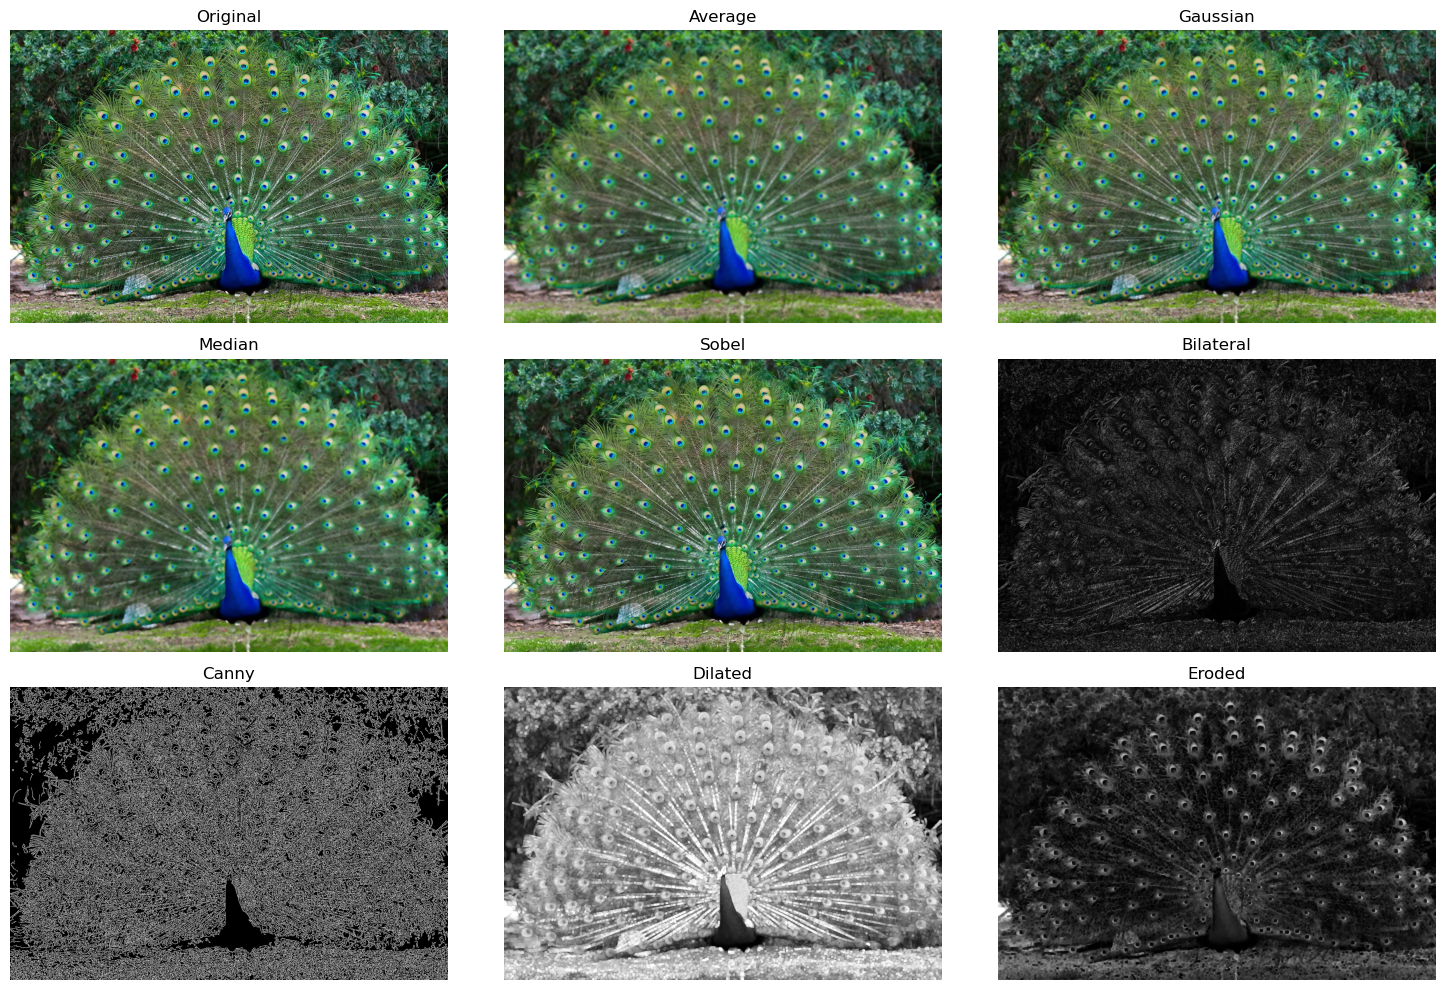

In [6]:
#PROGRAM:
# Exno.1 implementation of various filter technique
# 📦 Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 🖼️ Load the image (update the path as needed)
img = cv2.imread(r'peacock.webp')

# ⚠️ Check if image is found
if img is None:
    raise FileNotFoundError("Image not found. Please check your path.")

# 🎨 Convert image to grayscale and RGB
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 🔢 Define kernel size
k = 7

# 🧠 Apply various image filters
filters = [
    cv2.blur(img, (k, k)),                         # 1. Average Blur
    cv2.GaussianBlur(img, (k, k), 0),              # 2. Gaussian Blur
    cv2.medianBlur(img, k),                        # 3. Median Blur
    cv2.bilateralFilter(img, 9, 75, 75),           # 4. Bilateral Filter
    cv2.Canny(gray, 100, 200),                     # 5. Canny Edge Detection
    cv2.dilate(gray, np.ones((5, 5), np.uint8), 1),# 6. Dilation
    cv2.erode(gray, np.ones((5, 5), np.uint8), 1)  # 7. Erosion
]

# 🧮 Apply Sobel operator (edge detection)
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, 5)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, 5)
sobel = sobel_x + sobel_y
sobel = cv2.normalize(np.abs(sobel), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Insert Sobel between Median and Bilateral in the list
filters.insert(4, sobel)

# 🏷️ Titles for display
titles = ['Original', 'Average', 'Gaussian', 'Median', 'Sobel', 
          'Bilateral', 'Canny', 'Dilated', 'Eroded']

# Combine all images (original + filters)
imgs = [img] + filters

# 📊 Display all images in a grid
plt.figure(figsize=(15, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(imgs[i], cmap='gray' if len(imgs[i].shape) == 2 else None)
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
